<a href="https://colab.research.google.com/github/cristianexer/tmp/blob/main/Estimating_Probabilities_with_Bayesian_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimating Probabilities with Bayesian Modeling


![](https://miro.medium.com/max/1200/1*YVL0hT1qsR8KPpkFDV2-wA.jpeg)

## Aim and Objecives

Estimating Probabilities with Bayesian Modeling in Python 
 
**Objectives:** 
- Get familiar with probabilities and distributions in Bayesian Modeling 
- Research and understand the underlaying concepts of Bayesian Modeling 
- Get a clear understanding of Frequentist vs Bayesian approaches (how they differ)
- Implement a simple Model to estimate the probabilities on the Titanic data 
 
 

## Background Research

**Probability Distributions**

***What is a distribution ?*** [source](https://machinelearningmastery.com/statistical-data-distributions/)

From a practical perspective, we can think of a distribution as a function that describes the relationship between observations in a sample space.

---
***What is a multinomial distribution ?***

The multinomial distribution is the type of probability distribution used to calculate the outcomes of experiments involving two or more variables. The more widely known binomial distribution is a special type of multinomial distribution in which there are only two possible outcomes, such as true/false or heads/tails.

---
***What is a prior and posterior distribution ?*** [For more details see discussion here](https://stats.stackexchange.com/questions/58564/help-me-understand-bayesian-prior-and-posterior-distributions)

It is a combination of the prior distribution and the likelihood function, which tells you what information is contained in your observed data (the “new evidence”). In other words, the posterior distribution summarizes what you know after the data has been observed.


***Probability***

$P = \frac{(Number-of-favourable-outcomes)}{(Total-number-of-favourable-outcomes)}$
---

***Conditional Probability***

$P(B|A) = \frac{P(A∩B)}{P(A)}$
---
***Chain rule***

 We can rearrange the formula for conditional probability to get the so-called product rule:

$P(A,B) = p(A|B) p(B)$
---
We can extend this for three variables:

$P(A,B,C) = P(A| B,C) P(B,C) = P(A|B,C) P(B|C) P(C)$
---

and in general to n variables:

$P(A1, A2, ..., An) = P(A1| A2, ..., An) P(A2| A3, ..., An) P(An-1|An) P(An)$
---


***Bayes' Theorem*** [source](https://blogs.kent.ac.uk/jonw/files/2015/04/Puza2005.pdf)

![](https://www.probabilisticworld.com/wp-content/uploads/2016/06/bayes-theorem-with-description-2.png)

$P(A|B)$ = $\frac{P(B|A) P(A)}{P(B)}$
---

Reading: Probability of A given B equals (probability of B given A times probability of A ) divided by probability of B

---
Its fundamental aim is to formalize how information about one event can give us understanding of another



## Frequentist vs Bayesian



![](https://cxl.com/wp-content/uploads/2015/08/frequentists_vs_bayesians.png)

**Frequentist**

A Frequentist method makes predictions on the underlying truths of the experiment using only data from the current experiment.

Frequentist arguments are more counter-factual in nature, and resemble the type of logic that lawyers use in court. Most of us learn frequentist statistics in entry-level statistics courses. A t-test, where we ask, “Is this variation different from the control?” is a basic building block of this approach.

>I don’t know what the mean female height is. However, I know that its value is fixed (not a random one). Therefore, I cannot assign probabilities to the mean being equal to a certain value, or being less/greater than some other value. The most I can do is collect data from a sample of the population and estimate its mean as the value which is most consistent with the data.

**Bayesian**

Bayesian statistics take a more bottom-up approach to data analysis. This means that past knowledge of similar experiments is encoded into a statistical device known as a prior, and this prior is combined with current experiment data to make a conclusion on the test at hand.

>I agree that the mean is a fixed and unknown value, but I see no problem in representing the uncertainty probabilistically. I will do so by defining a probability distribution over the possible values of the mean and use sample data to update this distribution.

## Estimating probabilities on The Titanic

![](https://www.maritimecyprus.com/wp-content/uploads/2015/10/titanic-infographic-1536x951.jpg)

**Imports**

In [1]:
# data manipulation packages
import pandas as pd
import numpy as np

# viz packages
from matplotlib import pyplot as plt
import seaborn as sns

# plotting settings
plt.style.use('seaborn') # plotting theme
sns.set_style('whitegrid')
plt.rcParams['axes.facecolor'] = 'white' # set plot background to white (readability for dark mode)

**Data**

[Link to data](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html)

On April 15, 1912, the largest passenger liner ever made collided with an iceberg during her maiden voyage. When the Titanic sank it killed 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck resulted in such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.

The titanic.csv file contains data for 887 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including whether they survived

Note:

**pclass**: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower


In [2]:
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
df[:3]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250


check for missing values

In [3]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

**Create age groups**

In [4]:
bins = [0,8,16,32,48,64,75,120]
bins_labels = ['1-8','8-16','16-32','32-48','48-64','64-75','75+']
df['AgeGroup'] = pd.cut(df.Age,bins=bins,labels=bins_labels)
df[:3]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,AgeGroup
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,16-32
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,32-48
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,16-32


**Number of passangers by Age Group and Survival**

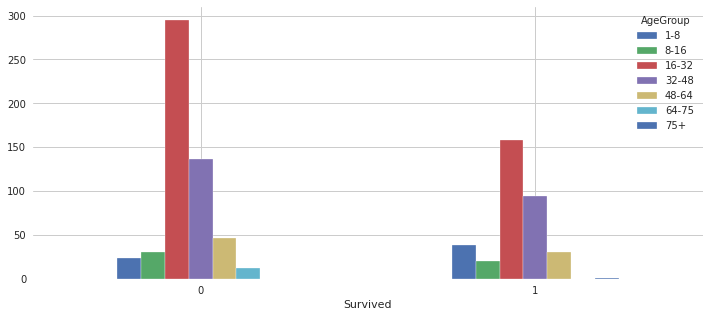

In [5]:
pd.crosstab(df.Survived,df.AgeGroup).plot.bar(figsize=(12,5),rot=0);

**Feature Correlation**

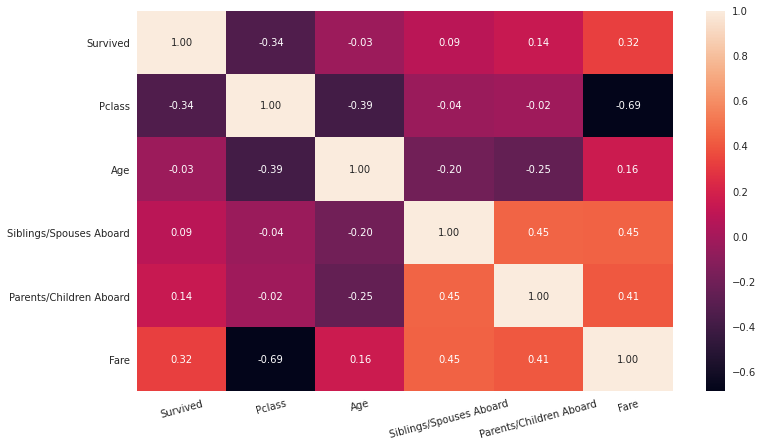

In [6]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(method='spearman'),annot=True,fmt='.2f')
plt.xticks(rotation=15);

## Models

select few features that we are going to use for training our model

In [7]:
features = ['AgeGroup','Pclass','Sex']
target = 'Survived'

first we want to calculate prior distribution for our target

prior = $P(Survived)$

Target classes:
- 0 - Did not survive / False
- 1 - Survieved / True

In [8]:
prior = df.groupby(target).size().div(len(df)) 
prior

Survived
0    0.614431
1    0.385569
dtype: float64

Then we want to calculate the coditional probability of survived given features

eg. $P(Survived=1|Age)$ 

in the example below we used the AgeGroup to make it more readable but we should also be able to use Age

In [9]:
likelihood = {}
likelihood['pclass'] = df.groupby([target, 'Pclass']).size().div(len(df)).div(prior)
likelihood['age'] = df.groupby([target, 'AgeGroup']).size().div(len(df)).div(prior)
likelihood['sex'] = df.groupby([target, 'Sex']).size().div(len(df)).div(prior)
likelihood

{'age': Survived  AgeGroup
 0         1-8         0.044037
           8-16        0.056881
           16-32       0.541284
           32-48       0.249541
           48-64       0.086239
           64-75       0.022018
           75+         0.000000
 1         1-8         0.114035
           8-16        0.058480
           16-32       0.461988
           32-48       0.274854
           48-64       0.087719
           64-75       0.000000
           75+         0.002924
 dtype: float64, 'pclass': Survived  Pclass
 0         1         0.146789
           2         0.177982
           3         0.675229
 1         1         0.397661
           2         0.254386
           3         0.347953
 dtype: float64, 'sex': Survived  Sex   
 0         female    0.148624
           male      0.851376
 1         female    0.681287
           male      0.318713
 dtype: float64}

Then for example we want to find the probability of surviving given male

$P(Survived=1|Sex=Male)$

we can selecte the likelihood of surviving male and multiply it by the prior value of surviving


In [10]:
surviving_proba = (likelihood['sex'][1]['male'] * prior[1]) / (df[df.Sex=='male']['Sex'].count() / len(df))
surviving_proba

0.19022687609075042

another example for the probability of surviving given age

$P(Survived=1|48<Age<64)$

In [11]:
surviving_proba = (likelihood['age'][1]['48-64'] * prior[1] ) / (df[df.AgeGroup=='48-64']['AgeGroup'].count() / len(df))
surviving_proba

0.3896103896103896

Then we created a small class for our classifier which brings together the concept from above, however this classifier won't be able to predict data with values that haven't been seen by our model during the training process

In [12]:
class CondProbabilities:

    def fit(self,dataframe,features,target):

        self.prior = dataframe.groupby(target).size().div(len(dataframe))

        self.target_class = dataframe[target].unique()

        self.likelihood = dict()

        for feature in features:
            
             self.likelihood[feature] = dataframe.groupby([target, feature]).size().div(len(dataframe)).div(self.prior)

    def predict(self,row):

        results = dict(zip(self.target_class,(1,1)))

        for t in self.target_class:

            for f in list(self.likelihood.keys()):

                results[t] *= self.likelihood[f][t][row[f]]

            results[t] *= self.prior[t]

        return results

Now let's train our model

In [13]:
cp = CondProbabilities()
cp.fit(df,features,target)

and use a sample of data to predict the probabilities

In [14]:
sample = df.copy()[features + [target]]
sample['y_pred'] = sample.apply(lambda x: cp.predict(x)[1],axis=1)
sample = sample.drop_duplicates()
sample[:5]

,AgeGroup,Pclass,Sex,Survived,y_pred
0,16-32,3,male,0,0.019754
1,32-48,1,female,1,0.028711
2,16-32,3,female,1,0.042226
4,32-48,3,male,0,0.011752
6,48-64,1,male,0,0.004287


**Naive Bayes Classifier** ([Docs](https://scikit-learn.org/stable/modules/naive_bayes.html))

In the next phase we want to train bayes classifier model using the sklearn package

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

we take a copy of our dataframe and encode it using the label encoder from sklearn

In [16]:
df_copy = df.copy()[features + [target]]
df_copy[['AgeGroup','Sex']] = df_copy[['AgeGroup','Sex']].apply(LabelEncoder().fit_transform)

then we split our data into train and test

In [18]:
train, test = train_test_split(df_copy, test_size=0.33, random_state=42,stratify=df_copy[target])

and finally we can train the model

In [19]:
clf = MultinomialNB()
clf.fit(train[features], train[target])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

here we take a copy of our test dataframe and use our model to predict the probabilities on the test data, then store the results into the y_pred column

In [20]:
results = test.copy()
results['y_pred'] = clf.predict_proba(test[features])[:,1]
results[:3]

,AgeGroup,Pclass,Sex,Survived,y_pred
444,2,1,1,1,0.312498
454,2,1,0,1,0.480380
879,1,2,1,0,0.282637


now we can see and compare our target distribution with the predicted distribution

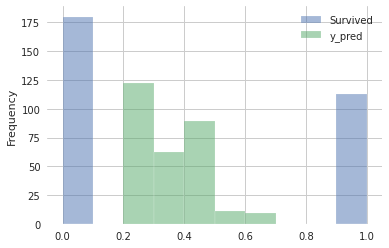

In [21]:
results[[target,'y_pred']].plot.hist(alpha=.5);

## Conclusion

- While the frequentist is using just the prior data to draw conclusions, the bayesian way is taking account of prior data and the new data
- Is quite difficult to formulate the problem in a probabilistic way
- **Chain rule is an alternative way of using Bayes Theoreme**
- In a Naive Bayes classifier that features are independent of each other given the class.

## Future Development / Next Sprint

- Sampling strategies
    - Research about sampling strategies
    - Try and compare probabilities based on sampling strategy

**Sources:**
- [Bayes Theoreme with Lego](https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego)
- [Naive-Bayes-Pandas](http://deebuls.github.io/Naive-Bayes-Pandas.html)
- [The quick-and-dirty difference between Frequentist and Bayesian statistics](https://cxl.com/blog/bayesian-frequentist-ab-testing/)
- [Frequentist and Bayesian Approaches in Statistics](https://www.probabilisticworld.com/frequentist-bayesian-approaches-inferential-statistics/)
- [Naive Bayes Classifier: Bayesian Inference, Central Limit Theorem](https://towardsdatascience.com/naive-bayes-classifier-bayes-inference-central-limit-theorem-python-c-implementation-bdffb3b35de)
- [An Intuitive (and Short) Explanation of Bayes’ Theorem](https://betterexplained.com/articles/an-intuitive-and-short-explanation-of-bayes-theorem/)
